# CNN_tutorial 2

---

## Transfer Learning

![transfer](./img/transfer1.png)
기존의 기계학습 알고리즘에서는 2개의 훈련 데이터셋을 학습할 때, 2개의 모델을 각각 독립적으로 만들어서 사용합니다.
<br>

![transfer](./img/transfer2.png)
Transfer learning은 이전에 사용되었던 모델의 정보를 입력받아 새로운 모델을 학습합니다.
이 때, 사전에 학습되는 모델을 **pre-training**, 새로운 모델을 학습하는 과정을 **fine-tuning**이라고 정의합니다.
<br>

![transfer](./img/transfer3.png)
Fine tuning에는 데이터셋의 형태나 분포에 따라 유형을 나눌 수 있습니다. 우리는 세번째 방식으로 진행하도록 하겠습니다.

---

## IMAGENET

![imagenet](./img/imagenet.jpeg)

- 2010년 ImageNet Large Scale Visual Recognition Challenge(ILSVRC)라는 대회를 통해 나온 데이터셋
- 약 20000여개 이상의 class와 총 14,197,122장의 이미지로 구성되어있다.

## AlexNet, 2012
<br>

![alexnet](./img/alexnet.png)

<center>[AlexNet architecture]</center>
<br>

- 2012 ILSVRC대회에 압도적인 성적으로 우승
- 11x11conv, 5x5conv, 3x3conv 3가지 conv를 사용하여, 총 8개의 layer(5개의 Convnet, 3개의 Densenet)로 구성되어있다.<br>

![alexnet2](./img/alexnet2.PNG)
- 기존에 사용되던 tanh가 아닌 relu를 사용하였고, 빠르게 수렴하였다.
- 현재는 거의 사용되지 않는 Local Response Normalization(LRN)을 사용
- pooling의 kernel size를 stride보다 크게 하여 pooling이 겹치게 진행되게 하는 overlapping pooling을 사용
- horizontal flip과 random crop을 사용한 data augmentation을 적용하였다.



<br>
<br>

---

## VGG, 2014
<br>

![vgg](./img/vgg.png)

<center>[VGG architecture]</center>

- ILSVRC 2014대회 2위의 성적을 거두었다.
- VGG는 3x3 conv만을 사용하여 사용하기 쉬운 구조와 좋은 성능으로 많은 인기를 끌었다.
- AlexNet 이 8개의 layer를 쌓았다면, VGG는 11개, 13개, 16개, 19개 등 많은 수의 layer를 사용 
    - VGG16, VGG19가 가장 많이 사용되어지며 특히 VGG16이 가장 많이 사용되어진다

![vgg_contri](./img/vgg_contribution.png)

- 3x3conv만을 사용한 이유는 3x3conv 2개를 사용하면 5x5conv와 같은 크기의 image field를 network가 볼 수 있고, weight의 개수가 더 적어 효율적이기 때문이다.
- 또한 5x5conv를 사용할 때 activation function이 1번, 3x3conv 2개를 사용할 때 activation function이 2번 사용되어지기 때문에 더 많은 비선형성을 얻을 수 있다. 
<br>
<br>

---

## GoogLeNet(Inception), 2014


![google](./img/googlenet.PNG)
- ILSVRC 2014대회에서 1위의 성적을 거두었다.
- 총 22개의 layer로 구성되어 있으며, 굉장히 길고 복잡한 구조로 구성되어있다.

<br>

![googlenet2](./img/googlenet2.PNG)

<center>[GoogLeNet]</center>

- **inception module**이라는 block 구조를 제안하였다. 
    - 기존에는 각 layer간에 하나의 conv연산 하나의 pooling으로 연결하였다면, inception module은 총 4가지 서로 다른 연산을 거친 후 concatenation을 이용한다.
    - 다양한 receptive field를 보기 위해 1x1, 3x3, 5x5 conv연산을 섞어 사용
    - 3x3conv, 5x5conv를 지나기 전 1x1conv를 지나 Channel수를 줄인 다음, 다시 두 연산을 수행하는 **bottleneck구조**를 추가하여 연산량을 절반이상 줄이는 효과를 가지게 된다.
    
<br>

- 총 9개의 Inception module을 쌓아서 구성되며, 3번째와 6번째 module 뒤에 classifier를 추가로 붙여서 총 3개의 classifier를 사용하였고, 추가된 classifier를 **Auxiliary Classifier**라고 부릅니다.
    - classifier가 하나일 경우 network 앞부분에 gradient가 잘 전파가 안되는 vanishing problem이 발생할 수 있어 2개의 classifier를 추가로 붙여 완화하였다.
    - Auxiliary Classifier는 보조적인 역할을 맡아야 하기 때문에 0.3을 곱하여 total loss에 더하는 식으로 활용
    - training 단계에서만 활용되었고, inference단계에서는 사용되지 않음.

<br>

- Fully-Conneted Layer -> **Global Average Pooling(GAP)**
    - 대부분의 CNN은 fc-net이 parameter의 대부분을 차지하기 때문에 이를 GAP로 대체하여 parameter수를 크게 줄였다.
    - 각 feature map을 평균을 구하여 하나의 node로 바꿔주는 연산이며, GAP를 통해 1024개의 node를 만들고 마지막에 단 1개의 fc-net으로 classifer를 구성하였다.

![1x1](./img/1x1conv.png)
<center>[Example of 1x1conv]</center>
<br>
<br>

---

## ResNet
<br>

![resnet](./img/resnet.png)

<center>[resnet architecture]</center>

- ILSVRC 2015대회에서 1위의 성적을 거두었다.
- 위의 그림은 ResNet-34이며, ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-152등 5가지 버전으로 나태낼 수 있다.


![vanishing](./img/vanishing.png)

<center>[Vanishing Problem]</center>

- 이전 모델들에서는 gradient값이 소실되거나 폭발하는 vanishing/exploding problem이 발생합니다. 특히 vanishing problem이 네트워크가 깊어지면 더더욱 두드러지게 되는데, 이로인해 앞부분 layer들은 학습이 거의 진행되지 않게됩니다.

![res](./img/res.png)

- 우리는 더 깊은 네트워크가 더 좋은 성능을 가질 것으로 기대하지만, 실제 20 layer의 네트워크가 56 layer의 네트워크보다 훈련과 테스트 모두 error값이 낮습니다.<br>
<br>

![shortcut](./img/shortcut.png)
<center>[Shortcut]</center>

- 이러한 문제를 해결하기 위해 output에 input을 더해주는 shortcut/ skip connetion을 추가 시키는 방식을 활용합니다. 그 layer를 활용한 모델이 ResNet입니다.<br>
<br>


<br>
<br>

---

## EfficientNet

<br>

![scale](./img/scaling.PNG)
 
- 위 그림처럼 모델의 성능을 높이기 위해서 네트워크를 깊게 쌓거나 채널을 늘리거나 이미지의 resolution을 늘리는 방식으로 한다.<br>
- 현재까지의 저 3가지중 각각 한가지 들만을 늘려 성능을 높였다.<br>
- 3가지를 균형있게 늘린다면 좀 더 좋은 성능을 가질 수 있을 것이라는 가정을 두었다.
<br>
<br>

![efn_arch](./img/efn_structure.png)

<center>[Efficientnet0 architecture]</center>

- 강화학습을 이용하여 제한을 두고 3가지를 균형있게 늘려 최적의 모델을 딥러닝을 이용하여 찾았다.
<br>
<br>

![efn_result](./img/efn_result.PNG)


![efn_result2](./img/efn_result2.png)

<br>
<br>
<br>
<br>

## Tranfer Learning for pneumonia

### dataset을 같은 방식으로 불러와 보겠습니다.

In [49]:
import numpy as np # for linear algebra
import matplotlib.pyplot as plt #for plotting things
import os
import glob
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization, Dropout

In [50]:
# path of dataset
train_folder= './dataset/chest_xray/train/'
val_folder = './dataset/chest_xray/val/'
test_folder = './dataset/chest_xray/test/'
# train 
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

print("the number of training set : ", len(glob.glob(train_folder + '*/*.jpeg')))
print("the number of normal image in training set : ", len(os.listdir(train_n)))
print("the number of pneumonia image in training set : ", len(os.listdir(train_p)))

num_train = len(glob.glob(train_folder + '*/*.jpeg'))
num_val = len(glob.glob(val_folder + '*/*.jpeg'))
num_test = len(glob.glob(test_folder + '*/*.jpeg'))

the number of training set :  4567
the number of normal image in training set :  1128
the number of pneumonia image in training set :  3441


In [64]:
train_datagen = ImageDataGenerator(rotation_range = 30,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = True,
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

batch_size = 64
target_size = (128, 128)
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')# 다중 분류 문제일 경우 'categorical'

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 4567 images belonging to 2 classes.
Found 665 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### VGG16을 사용해봅시다!

In [52]:
from keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau, Callback, ModelCheckpoint

In [65]:
base_model = VGG16(include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(units=1, activation='sigmoid')(x)

vgg16 = Model(inputs=base_model.input, outputs=x)
vgg16.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)     

<br>
마지막 classifier layer만 학습을 할 계획이기 때문에 나머지 부분은 frozen 시켜줍니다
<br>
<br>

In [66]:
def print_layers(model):
    for idx, layer in enumerate(model.layers):
        print("layer {}: {}, trainable: {}".format(idx, layer.name, layer.trainable))

for layer in vgg16.layers[0:18]:
    layer.trainable = False
    
print_layers(vgg16)

layer 0: input_15, trainable: False
layer 1: block1_conv1, trainable: False
layer 2: block1_conv2, trainable: False
layer 3: block1_pool, trainable: False
layer 4: block2_conv1, trainable: False
layer 5: block2_conv2, trainable: False
layer 6: block2_pool, trainable: False
layer 7: block3_conv1, trainable: False
layer 8: block3_conv2, trainable: False
layer 9: block3_conv3, trainable: False
layer 10: block3_pool, trainable: False
layer 11: block4_conv1, trainable: False
layer 12: block4_conv2, trainable: False
layer 13: block4_conv3, trainable: False
layer 14: block4_pool, trainable: False
layer 15: block5_conv1, trainable: False
layer 16: block5_conv2, trainable: False
layer 17: block5_conv3, trainable: False
layer 18: block5_pool, trainable: True
layer 19: flatten_14, trainable: True
layer 20: dense_14, trainable: True


In [67]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1,
                                            factor = 0.1, min_lr = 0.000001)

In [68]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.98):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [69]:
vgg16.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


history = vgg16.fit(training_set,
    steps_per_epoch = num_train//batch_size,
    batch_size=batch_size,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = num_val//batch_size,
    callbacks = [reduce_lr, callbacks]
)

Epoch 1/10
71/71 [==============================] - 153s 2s/step - loss: 0.3061 - accuracy: 0.8654 - val_loss: 0.2488 - val_accuracy: 0.9047
Epoch 2/10
71/71 [==============================] - 151s 2s/step - loss: 0.1981 - accuracy: 0.9212 - val_loss: 0.2032 - val_accuracy: 0.9250
Epoch 3/10
71/71 [==============================] - 151s 2s/step - loss: 0.1754 - accuracy: 0.9296 - val_loss: 0.1767 - val_accuracy: 0.9406
Epoch 4/10
71/71 [==============================] - 151s 2s/step - loss: 0.1669 - accuracy: 0.9338 - val_loss: 0.1751 - val_accuracy: 0.9422
Epoch 5/10
71/71 [==============================] - 151s 2s/step - loss: 0.1608 - accuracy: 0.9389 - val_loss: 0.1845 - val_accuracy: 0.9312
Epoch 6/10
71/71 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.9456
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
71/71 [==============================] - 151s 2s/step - loss: 0.1483 - accuracy: 0.9456 - val_loss: 0.1780 - val_accurac

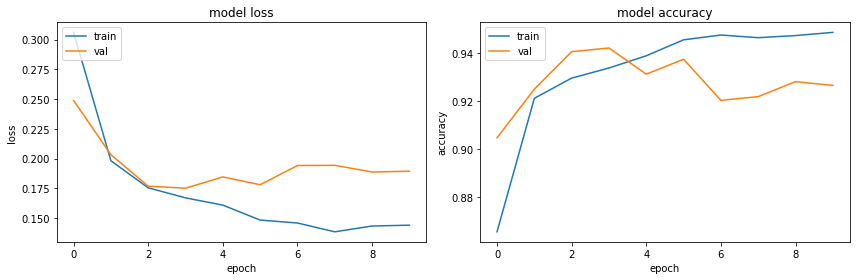

In [71]:
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(history)

In [74]:
score = vgg16.evaluate(test_set, verbose=0)
print('Model Loss: {}, Accuracy: {}'.format(score[0], score[1]))

Model Loss: 0.2474430799484253, Accuracy: 0.9150640964508057
